# Problem Statement
The problem entails leveraging machine learning classifiers to predict employee churn within the HR department. By analyzing historical data encompassing various employee attributes, such as satisfaction level, last evaluation, number of project, etc, the objective is to develop a predictive model capable of identifying individuals likely to leave the organization. This predictive capability aids HR in proactively addressing retention strategies, thereby mitigating the negative impact of employee turnover on organizational performance and culture.

In [1]:
import pandas as pd
import numpy as np

##Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

##Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

##
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\ML\hr_employee_churn_data.csv")
df.head()

In [ ]:
df = df.drop(columns = ['empid'])

In [ ]:
df.head(1)

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(subset=['satisfaction_level'], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
##DATA VIZUALIZATION

In [ ]:
df.head(2)

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='left', palette="Blues_r", hue='salary')
plt.title("Distribution of churn status by salary")
plt.xlabel("left")
plt.ylabel("Count")
plt.legend(title='salary')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='left', palette="Blues_r", hue='number_project')
plt.title("Distribution of churn status by number_project")
plt.xlabel("left")
plt.ylabel("Count")
plt.legend(title='number_project')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='left', palette="Blues_r", hue='time_spend_company')
plt.title("Distribution of churn status by Number of time_spend_company")
plt.xlabel("left")
plt.ylabel("Count")
plt.legend(title='time_spend_company')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='left', palette="Blues_r", hue='Work_accident')
plt.title("Distribution of churn status by Number of Work_accident")
plt.xlabel("left")
plt.ylabel("Count")
plt.legend(title='Work_accident')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='left', palette="Blues_r", hue='promotion_last_5years')
plt.title("Distribution of churn status by Number of promotion_last_5years")
plt.xlabel("left")
plt.ylabel("Count")
plt.legend(title='promotion_last_5years')
plt.show()

In [ ]:
df.head(2)

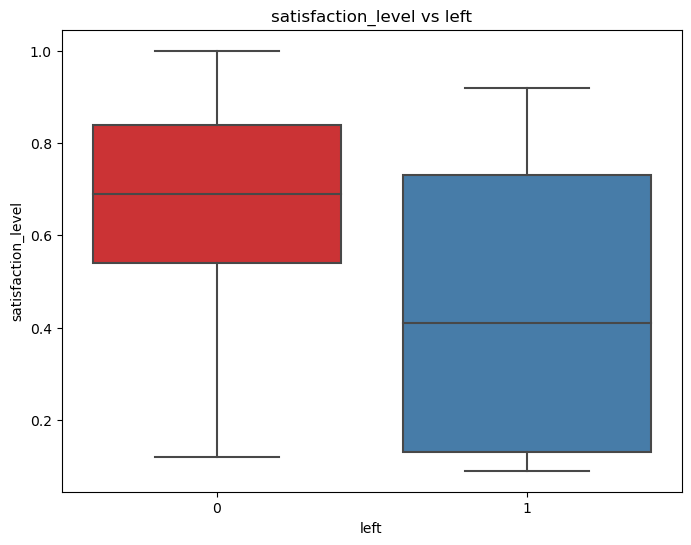

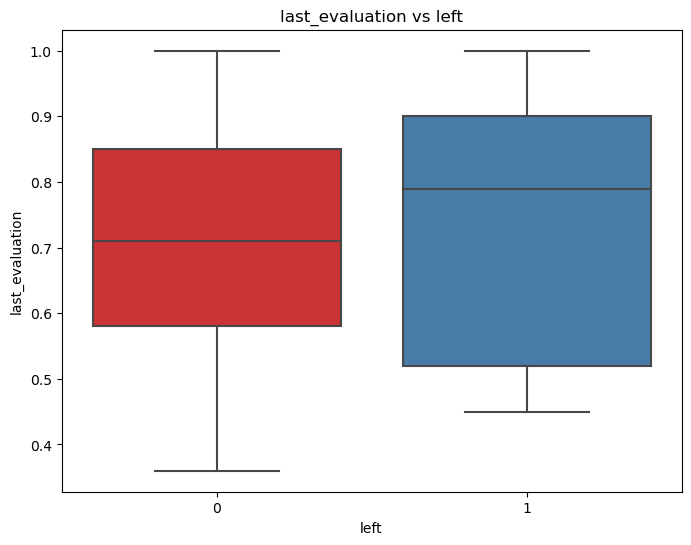

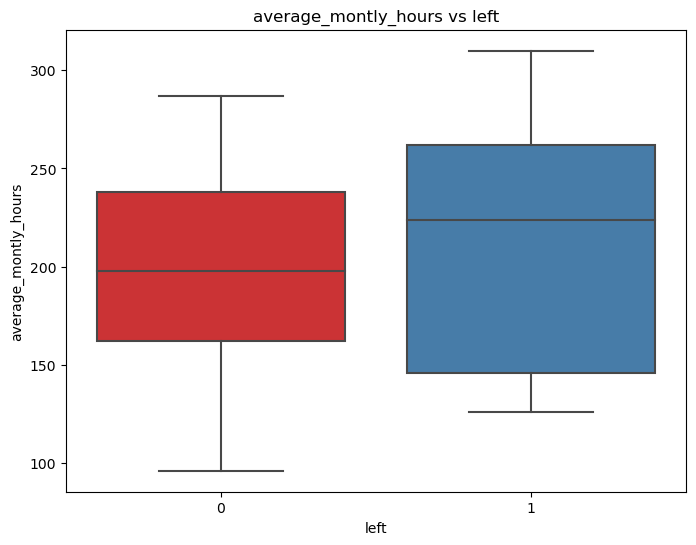

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette='Set1')
plt.title('satisfaction_level vs left')
plt.xlabel('left')
plt.ylabel('satisfaction_level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='last_evaluation', data=df, palette='Set1')
plt.title('last_evaluation vs left')
plt.xlabel('left')
plt.ylabel('last_evaluation')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='average_montly_hours', data=df, palette='Set1')
plt.title('average_montly_hours vs left')
plt.xlabel('left')
plt.ylabel('average_montly_hours')
plt.show()


In [24]:
#ENCODING CATEGORICAL COLUMN(S)

In [20]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [21]:
df['salary'] = df['salary'].replace({'low': 0, 'medium': 1, 'high': 2})

In [22]:
df.head(2)

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,0,1
1,2,0.80,0.86,5,262,6,0,0,1,1


In [48]:
X = df.drop(columns = 'left')
y = df['left']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Fit classifiers and calculate metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = (tn / (tn + fp)) * 100
    gmean = ((recall * specificity) ** 0.5)
    
    # Check if classifier supports predict_proba before using it
    if hasattr(clf, 'predict_proba'):
        roc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100
    else:
        roc_score = None
    
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    
    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'G-Mean': gmean,
        'Roc-Score': roc_score,
        'MCC': mcc
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort DataFrame based on accuracy
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Specificity'], ascending=[False, True, True])

# Print results DataFrame
print(results_df.to_string(index=False))


              Model  Accuracy  Precision    Recall  Specificity    G-Mean  Roc-Score       MCC
      Random Forest 99.333333  99.715100 97.493036    99.912358 98.695284  99.523612 98.165635
            XGBoost 98.766667  98.435277 96.378830    99.517967 97.935822  99.451014 96.597521
  Gradient Boosting 97.800000  97.521866 93.175487    99.255039 96.167233  98.708464 93.905653
           AdaBoost 96.033333  91.771269 91.643454    97.414549 94.484950  98.052092 89.100565
                KNN 94.566667  85.899094 92.479109    95.223488 93.841267  97.908758 85.562337
Logistic Regression 79.133333  61.165049 35.097493    92.988606 57.128513  81.900437 34.816149


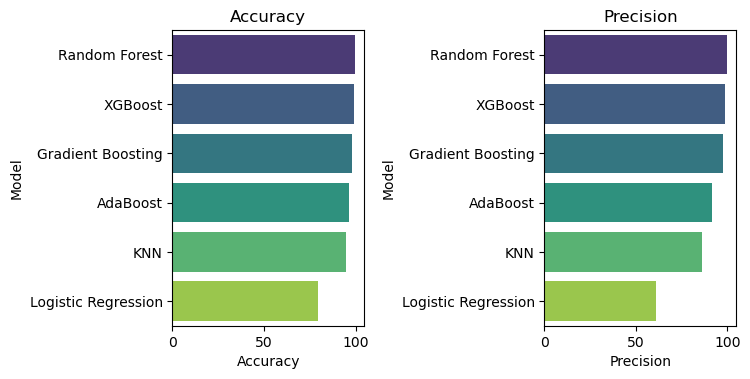

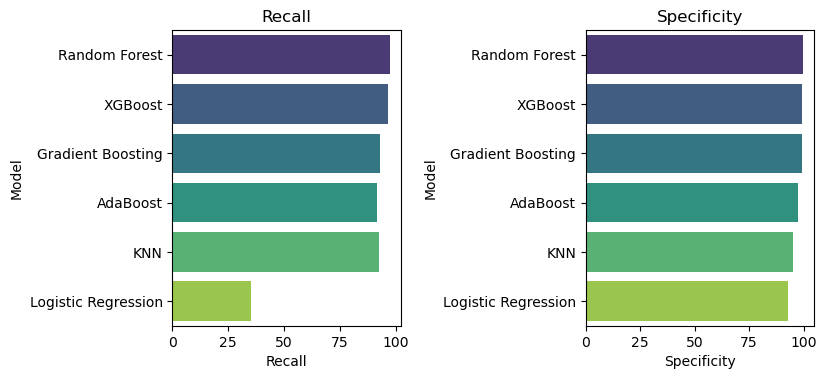

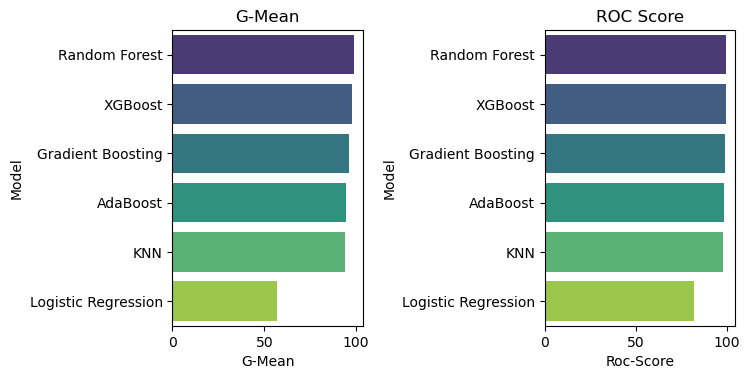

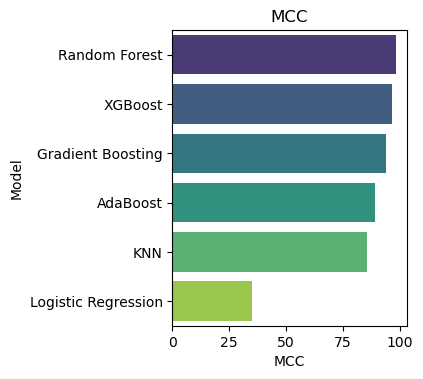

In [51]:
# Plot the results
plt.figure(figsize=(15, 7))

# Plot Accuracy
plt.subplot(2, 4, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Accuracy')

# Plot Precision
plt.subplot(2, 4, 2)
sns.barplot(x='Precision', y='Model', data=results_df, palette='viridis')
plt.title('Precision')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))

# Plot Recall
plt.subplot(2, 4, 3)
sns.barplot(x='Recall', y='Model', data=results_df, palette='viridis')
plt.title('Recall')

# Plot Specificity
plt.subplot(2, 4, 4)
sns.barplot(x='Specificity', y='Model', data=results_df, palette='viridis')
plt.title('Specificity')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))

# Plot G-Mean
plt.subplot(2, 4, 5)
sns.barplot(x='G-Mean', y='Model', data=results_df, palette='viridis')
plt.title('G-Mean')

# Plot ROC Score
plt.subplot(2, 4, 6)
sns.barplot(x='Roc-Score', y='Model', data=results_df, palette='viridis')
plt.title('ROC Score')

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 7))

# Plot MCC
plt.subplot(2, 4, 7)
sns.barplot(x='MCC', y='Model', data=results_df, palette='viridis')
plt.title('MCC')

plt.tight_layout()
plt.show()

Confusion Matrix for KNN:


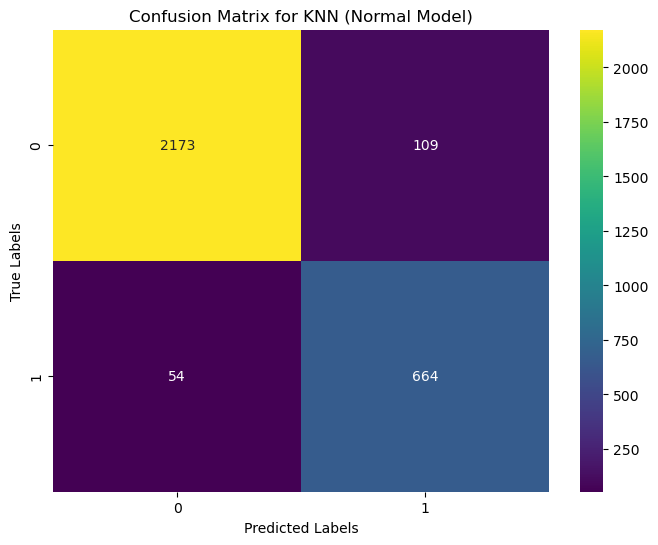

Confusion Matrix for Logistic Regression:


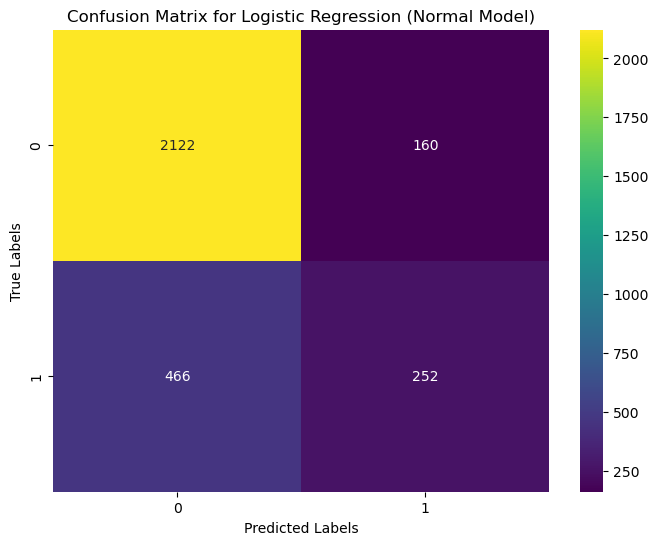

Confusion Matrix for Random Forest:


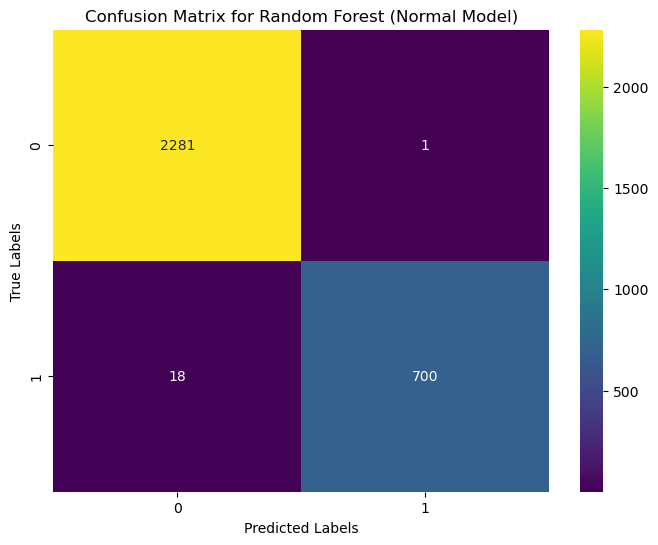

Confusion Matrix for XGBoost:


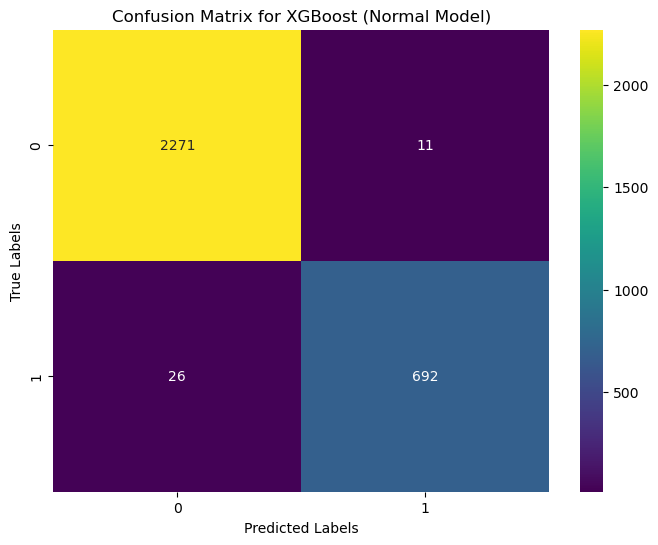

Confusion Matrix for Gradient Boosting:


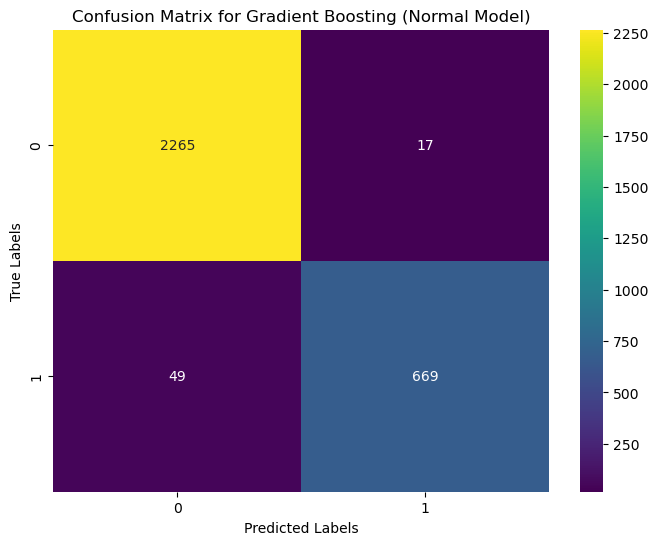

Confusion Matrix for AdaBoost:


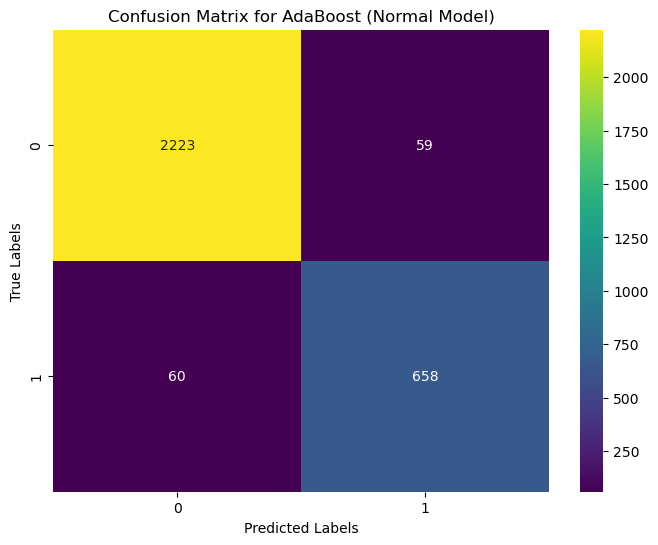

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loop through each classifier
for name, clf in classifiers.items():
    print(f"Confusion Matrix for {name}:")
    
    # Fit normal model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
    plt.title(f"Confusion Matrix for {name} (Normal Model)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    


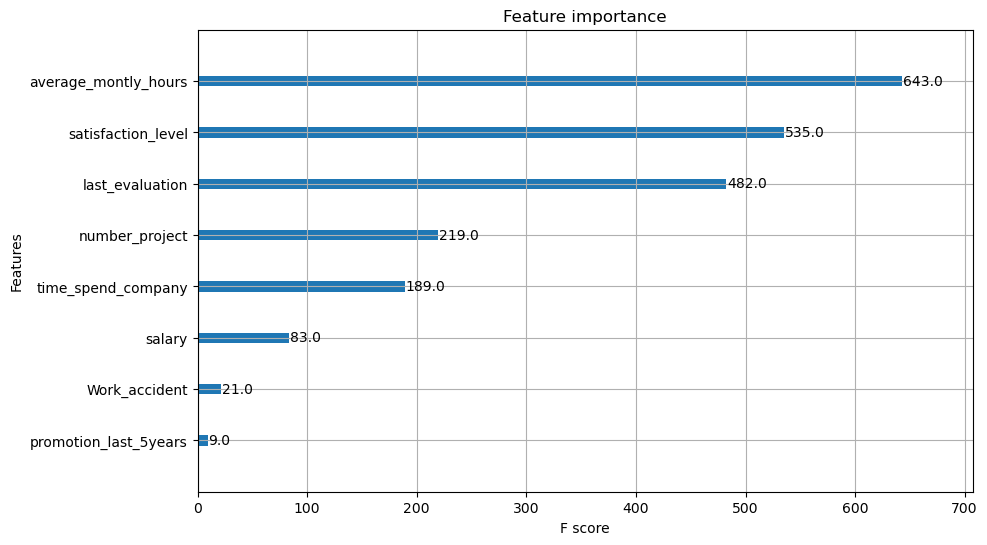

In [53]:
xgb_model = classifiers['XGBoost']  # Assuming 'XGBoost' is the key for XGBoost model in your 'classifiers' dictionary

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax)
plt.show()

In [54]:
import joblib

joblib.dump(xgb_model, 'myxgboost_model.pkl')

['myxgboost_model.pkl']